#Data Science Assignment 3

Name: Tanmay Vijay Shekhar

NUID: 002747412

#Abstract

The goal was to construct a realistic model to precisely predict the price of an uber ride in Boston. It is generally believed that it’s impossible to precisely predict a fair price of a cab ride as it depends on various factors. For this dataset price is the dependent variable and others are independent variables. First, major factors affecting the cab fares should be selected. Then, a model for cab ride price prediction should be established from linear regression. That should be applied to the boston cab rides dataset to test the model. Through the data analysis and test it can be summarized that the linear regression model can effectively predict and analyze the cab ride price to some extent, while the algorithm can still be improved through more advanced machine learning methods.

In [1]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html


In [30]:
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split as tts
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [31]:
#Loading the CSV File
df_train=pd.read_csv("https://raw.githubusercontent.com/tanmayshekhar07/DataScience_2/main/UberRides.csv")


In [32]:
df_train.head()

Unnamed: 0  distance cab_type    time_stamp    destination  \
0           0      0.44     Lyft  1.544950e+12  North Station   
1           1      0.44     Lyft  1.543280e+12  North Station   
2           2      0.44     Lyft  1.543370e+12  North Station   
3           3      0.44     Lyft  1.543550e+12  North Station   
4           4      0.44     Lyft  1.543460e+12  North Station   

             source  price  surge_multiplier  \
0  Haymarket Square    5.0               1.0   
1  Haymarket Square   11.0               1.0   
2  Haymarket Square    7.0               1.0   
3  Haymarket Square   26.0               1.0   
4  Haymarket Square    9.0               1.0   

                                     id    product_id          name  
0  424553bb-7174-41ea-aeb4-fe06d4f4b9d7     lyft_line        Shared  
1  4bd23055-6827-41c6-b23b-3c491f24e74d  lyft_premier           Lux  
2  981a3613-77af-4620-a42a-0c0866077d1e          lyft          Lyft  
3  c2d88af2-d278-4bfd-a8d0-29ca77cc5512   lyft_luxsuv  Lux Black XL  
4  e0126e1f-8ca9-4f2e-82b3-50505a09db9a     lyft_plus       Lyft XL

In [33]:
#taking the basic information of all the columns in the given dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        40000 non-null  int64  
 1   distance          40000 non-null  float64
 2   cab_type          40000 non-null  object 
 3   time_stamp        40000 non-null  float64
 4   destination       40000 non-null  object 
 5   source            40000 non-null  object 
 6   price             36865 non-null  float64
 7   surge_multiplier  40000 non-null  float64
 8   id                40000 non-null  object 
 9   product_id        40000 non-null  object 
 10  name              40000 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 3.4+ MB


# checking if there are any null values to eliminate them.

In [34]:
df_train.isnull().sum()

Unnamed: 0             0
distance               0
cab_type               0
time_stamp             0
destination            0
source                 0
price               3135
surge_multiplier       0
id                     0
product_id             0
name                   0
dtype: int64

# Eliminating all the null values.

In [35]:
#Filling the missing values of the price column using median. 
df_train['price'].fillna(df_train['price'].median(), inplace = True)

In [37]:
df_train.isnull().sum()


Unnamed: 0          0
distance            0
cab_type            0
time_stamp          0
destination         0
source              0
price               0
surge_multiplier    0
id                  0
product_id          0
name                0
dtype: int64

In [38]:
df_train.head()

Unnamed: 0  distance cab_type    time_stamp    destination  \
0           0      0.44     Lyft  1.544950e+12  North Station   
1           1      0.44     Lyft  1.543280e+12  North Station   
2           2      0.44     Lyft  1.543370e+12  North Station   
3           3      0.44     Lyft  1.543550e+12  North Station   
4           4      0.44     Lyft  1.543460e+12  North Station   

             source  price  surge_multiplier  \
0  Haymarket Square    5.0               1.0   
1  Haymarket Square   11.0               1.0   
2  Haymarket Square    7.0               1.0   
3  Haymarket Square   26.0               1.0   
4  Haymarket Square    9.0               1.0   

                                     id    product_id          name  
0  424553bb-7174-41ea-aeb4-fe06d4f4b9d7     lyft_line        Shared  
1  4bd23055-6827-41c6-b23b-3c491f24e74d  lyft_premier           Lux  
2  981a3613-77af-4620-a42a-0c0866077d1e          lyft          Lyft  
3  c2d88af2-d278-4bfd-a8d0-29ca77cc5512   lyft_luxsuv  Lux Black XL  
4  e0126e1f-8ca9-4f2e-82b3-50505a09db9a     lyft_plus       Lyft XL

In [39]:
# Importing necessary libraries
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder
import numpy as np



In [40]:
# Converting categorical columns to numeric using LabelEncoder
le = LabelEncoder()
df_train['cab_type'] = le.fit_transform(df_train['cab_type'])
df_train['source'] = le.fit_transform(df_train['source'])
df_train['destination'] = le.fit_transform(df_train['destination'])
df_train['name'] = le.fit_transform(df_train['name'])

In [41]:
# Drop non-numeric columns
df_train = df_train.select_dtypes(include=[np.number])

In [42]:
# Creating a function to calculate VIF for each feature
def calculate_vif(X):
    # Adding a small constant value to the diagonal of the correlation matrix
    corr = np.corrcoef(X, rowvar=False)
    corr += np.identity(corr.shape[0]) * 0.01
    # Calculating the inverse of the correlation matrix
    inv_corr = np.linalg.inv(corr)
    # Calculating VIF for each feature
    vif = np.diagonal(inv_corr)
    features = X.columns
    vif_df = pd.DataFrame({'Features': features, 'VIF': vif})
    vif_df = vif_df.sort_values(by='VIF', ascending=False).reset_index(drop=True)
    return vif_df

In [43]:
# Calculating VIF for all numeric features
vif_df = calculate_vif(df_train)
print(vif_df)

           Features       VIF
0             price  1.952109
1              name  1.881133
2          distance  1.220793
3          cab_type  1.220014
4  surge_multiplier  1.114732
5       destination  1.012913
6            source  0.999000
7        Unnamed: 0  0.991351
8        time_stamp  0.990454


Now we've gotten our VIF i.e our Variance inflation factor values.


The error message indicates that there are some non-numeric values in your dataset that are causing the variance_inflation_factor() function to fail. To fix this issue, you can convert all non-numeric values to NaN using the pd.to_numeric() function and then drop any rows that contain NaN using the dropna() function.

# Splitting the data into train and test.

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.api import OLS, add_constant

In [46]:
# Splitting the data into training and testing sets
X = df_train.drop(columns=['price'])
y = df_train['price']
X = add_constant(X) # adding constant term to the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# Fitting a linear model
model = OLS(y_train, X_train).fit()

In [48]:
# Interpreting the regression coefficients
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     4590.
Date:                Thu, 30 Mar 2023   Prob (F-statistic):               0.00
Time:                        02:11:48   Log-Likelihood:            -1.0450e+05
No. Observations:               32000   AIC:                         2.090e+05
Df Residuals:                   31992   BIC:                         2.091e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0005   1.02e-05  

In [49]:
# Predicting on the training set
y_pred_train = model.predict(X_train)

In [50]:
# Model performance on the training set
print('Training set performance:')
print('Mean Squared Error:', mean_squared_error(y_train, y_pred_train))
print('R-squared:', r2_score(y_train, y_pred_train))

Training set performance:
Mean Squared Error: 40.17046526820742
R-squared: 0.5010845222764095


In [51]:

!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [52]:
import shap

In [53]:
# Selecting 1% of the dataset
df_sample = df_train.sample(frac=0.01, random_state=42)

In [54]:
# Adding a constant column
df_sample['intercept'] = 1

In [55]:
# Training a linear regression model on the sample data
X_sample = df_sample.drop('price', axis=1)
y_sample = df_sample['price']
model = LinearRegression().fit(X_sample, y_sample)

In [56]:
# Creating a SHAP explainer object
import shap
explainer = shap.LinearExplainer(model, X_sample)

In [57]:
# Adding the constant term to the test data
X_test = add_constant(X_test)

In [58]:
# Computing SHAP values for the test data
shap_values = explainer.shap_values(X_test)

In [59]:
# Computing SHAP values for the test data
X_test = X_test.drop('const', axis=1)
expected_value = explainer.expected_value
X_test['expected_value'] = expected_value
shap_values = explainer.shap_values(X_test)

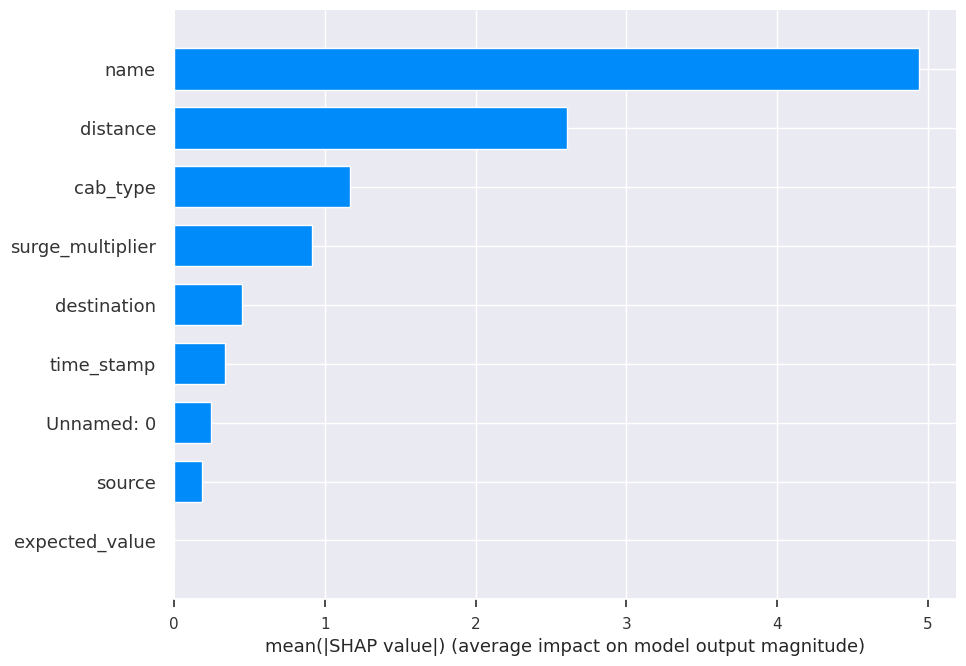

In [61]:
# Plotting SHAP summary plot for the test data
shap.summary_plot(shap_values, X_test, plot_type='bar', plot_size=(10, 7))

In [62]:
# Visualizing the SHAP values for the first observation in X_test
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

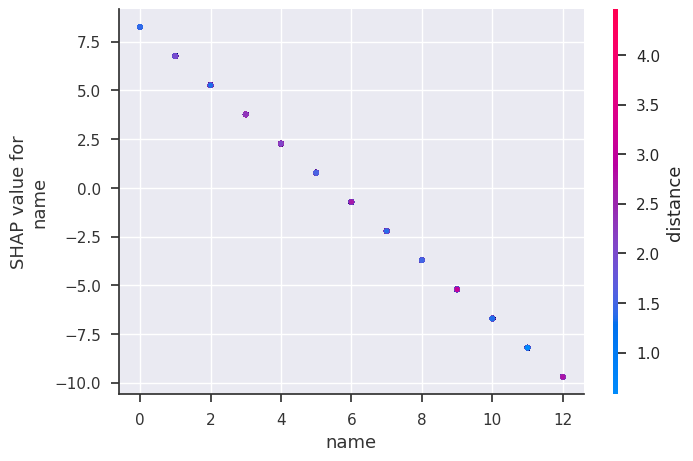

In [63]:
shap.dependence_plot("name", shap_values, X_test)

#Now moving onto the Random Forest algorithm 

In [64]:
# Creating X and y variables
X = df_train.drop(['price'], axis=1)
y = df_train['price']


In [65]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [66]:
# Define a function to train a RandomForest model and compute metrics
def ramdomforest(X_train, y_train, X_test, y_test):
    rf = RandomForestRegressor()
    rf_model = rf.fit(X_train, y_train)
    print('Train set')
    pred = rf_model.predict(X_train)
    print('RandomForest Mean Squared error: {}'.format(mean_squared_error(y_train, pred)))
    print('RandomForest r2_score: {}'.format(r2_score(y_train, pred)))
    print('Test set')
    pred = rf_model.predict(X_test)
    print('RandomForest Mean Squared error: {}'.format(mean_squared_error(y_test, pred)))
    print('RandomForest r2_score: {}'.format(r2_score(y_test, pred)))

In [67]:

# Train a RandomForest model and compute metrics
ramdomforest(X_train, y_train, X_test, y_test)

Train set
RandomForest Mean Squared error: 0.43114975624999996
RandomForest r2_score: 0.9946451382832221
Test set
RandomForest Mean Squared error: 3.0471944062499996
RandomForest r2_score: 0.9628563903867658


# SHAP Analysis on Random Forest Model


In [68]:
# Train a RandomForest model with 100 estimators and fit it to the data
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train)

RandomForestRegressor()

In [69]:
shap.initjs() #Initialize java script

In [70]:
# Giving input as 1% of whole dataset as SHAP cant handle large dataset
X = X_train.head(10)

In [71]:
 # Using Tree explainer as this is tree based classifier model
explainer = shap.TreeExplainer(random_forest)

In [72]:
#Saving shap values
shap_values = explainer.shap_values(X)

In [73]:
# Explain one row in the data with the model
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

In [74]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X)  

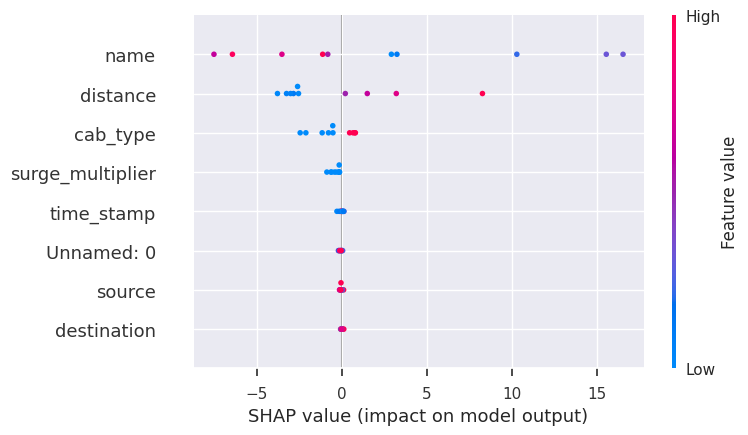

In [75]:
shap.initjs()
shap.summary_plot(shap_values, X) 

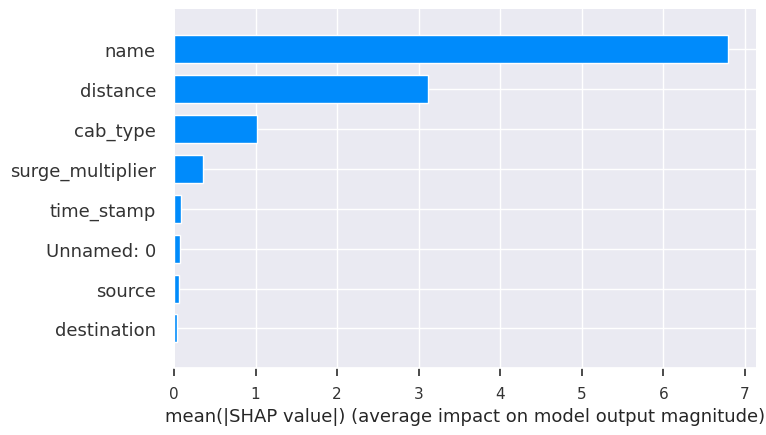

In [76]:
shap.summary_plot(shap_values, X, plot_type="bar")

In [77]:
from sklearn.ensemble import RandomForestRegressor

In [78]:
from sklearn.datasets import load_iris

In [79]:
iris = load_iris()

In [80]:
model_rf1 = RandomForestRegressor(n_estimators=10)
# Train
model_rf1.fit(iris.data, iris.target)
# Extract single tree
estimator = model_rf1.estimators_[5]

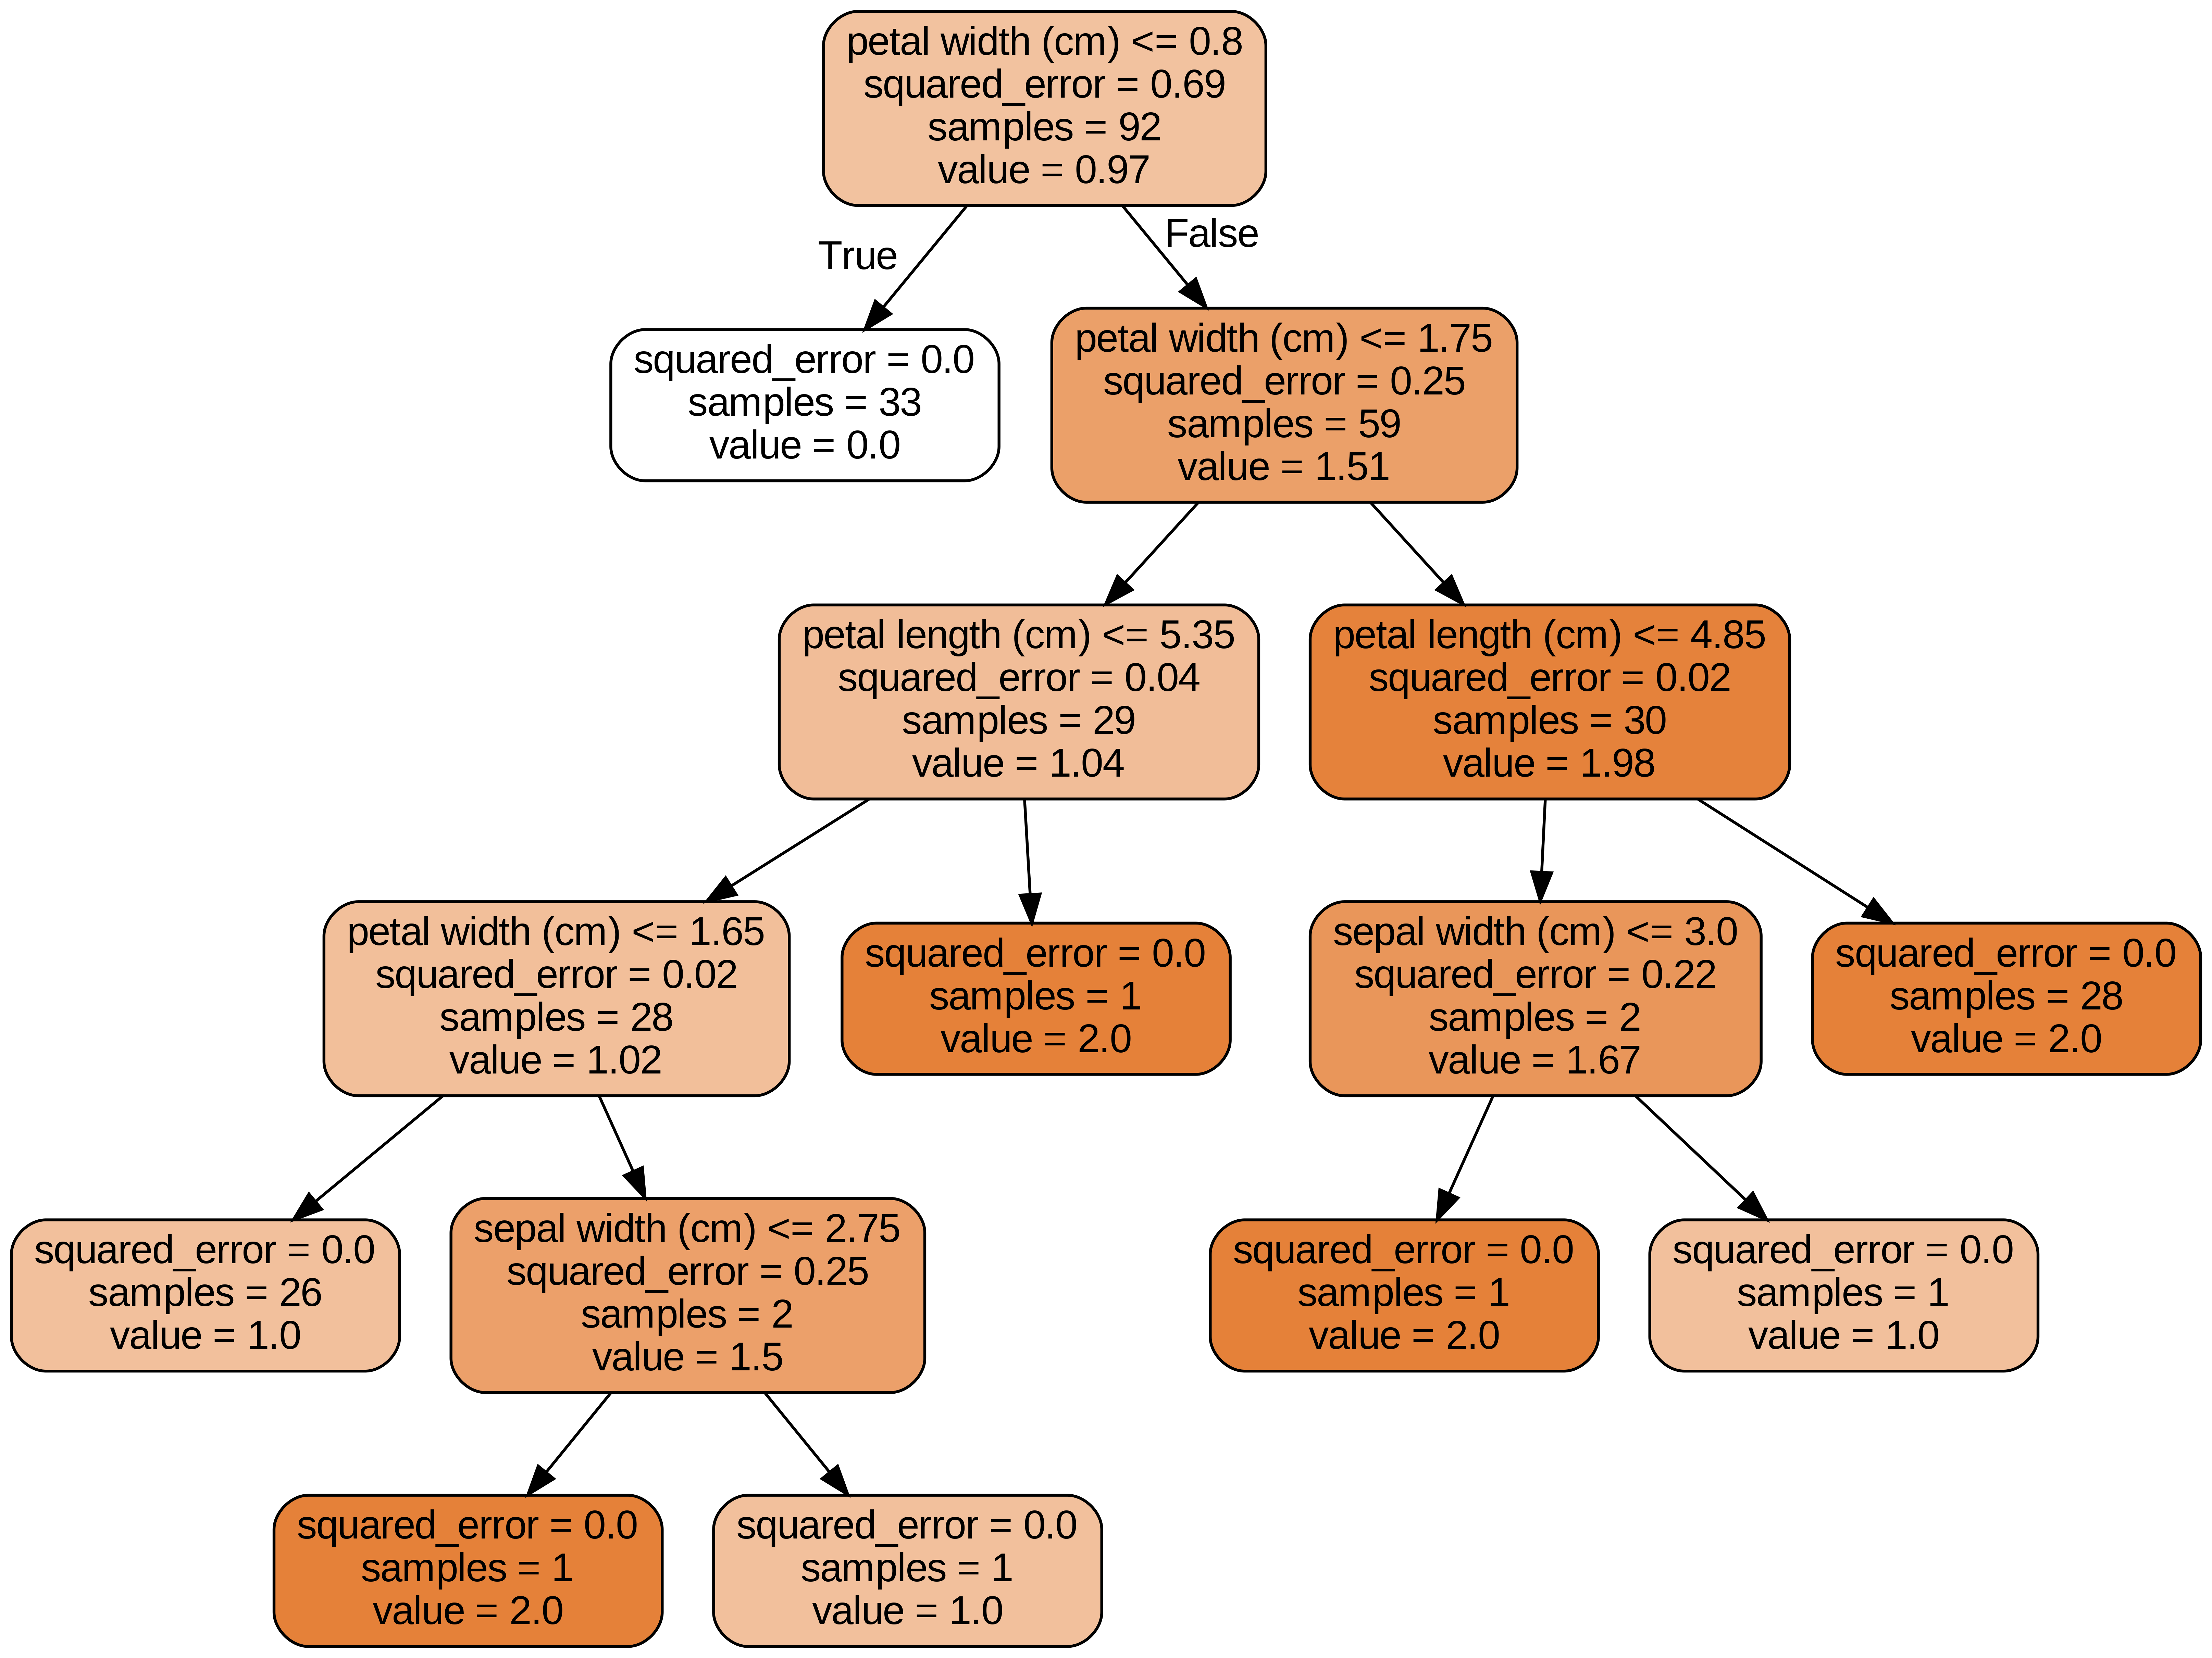

In [81]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in colab notebook
from IPython.display import Image
Image(filename = 'tree.png')

For the random forest model according to SHAP Analysis the important features to determine the target variable 'Price' is name(which is nothing but the car model), distance and cab_type. name is the common feature which is important for both our Random Forest and Linear Regression Model. name has the highest value of feature importance and hence is placed first on the scale.

# Using AutoML to identify best model

In [123]:
# Import necessary libraries
import pandas as pd
import h2o
from h2o.automl import H2OAutoML

In [124]:
# initialize the h2o cluster
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  ----------------------------------
H2O_cluster_uptime:         1 hour 44 mins
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.40.0.2
H2O_cluster_version_age:    20 days
H2O_cluster_name:           H2O_from_python_unknownUser_dexn1e
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    2.981 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.9.16 final
--------------------------  ----------------------------------

In [125]:
# Load the Uber rides dataset
url = "https://raw.githubusercontent.com/tanmayshekhar07/DataScience_2/main/UberRides.csv"
data = pd.read_csv(url)

In [126]:

h2o.init()
h2o_data = h2o.H2OFrame(data)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  ----------------------------------
H2O_cluster_uptime:         1 hour 45 mins
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.40.0.2
H2O_cluster_version_age:    20 days
H2O_cluster_name:           H2O_from_python_unknownUser_dexn1e
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    2.981 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.9.16 final
--------------------------  ----------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [127]:
# Set the target variable
target = "price"

In [128]:
df = h2o.H2OFrame(data)
df_train, df_test = df.split_frame([0.75])
print(df_train)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
  Unnamed: 0    distance  cab_type      time_stamp  destination              source              price    surge_multiplier  id                                    product_id    name
           0        0.44  Lyft         1.54495e+12  North Station            Haymarket Square      5                     1  424553BB-7174-41EA-AEB4-FE06D4F4B9D7                Shared
           1        0.44  Lyft         1.54328e+12  North Station            Haymarket Square     11                     1  4BD23055-6827-41C6-B23B-3C491F24E74D                Lux
           2        0.44  Lyft         1.54337e+12  North Station            Haymarket Square      7                     1  981A3613-77AF-4620-A42A-0C0866077D1E                Lyft
           3        0.44  Lyft         1.54355e+12  North Station            Haymarket Square     26                     1  C2D88AF2-D278-4BFD-A8D0-29CA77CC5512                Lux 

In [129]:
x = df.columns
y = 'price'
x = x.remove(y)

aml = H2OAutoML(max_runtime_secs=222, balance_classes=True, seed=1) 
aml.train(x = x, y = y, training_frame = df_train)

AutoML progress: |
04:42:36.868: _train param, Dropping bad and constant columns: [id, product_id]
04:42:36.958: XGBoost_1_AutoML_3_20230330_44236 [XGBoost def_2] failed: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for XGBoost model: XGBoost_1_AutoML_3_20230330_44236_cv_1.  Details: ERRR on field: _response_column: Response contains missing values (NAs) - not supported by XGBoost.

04:42:36.960: _train param, Dropping bad and constant columns: [id, product_id]

████
04:42:41.947: _train param, Dropping bad and constant columns: [id, product_id]

████████████████
04:43:44.231: _train param, Dropping unused columns: [id, product_id]
04:43:45.254: _train param, Dropping bad and constant columns: [id, product_id]
04:43:45.279: XGBoost_2_AutoML_3_20230330_44236 [XGBoost def_1] failed: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for XGBoost model: XGBoost_2_AutoML_3_20230330_44236_cv_1.  Details: ERRR on field: _response_col

Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_3_20230330_44236


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  3/6
# GBM base models (used / total)      3/4
# DRF base models (used / total)      0/1
# GLM base models (used / total)      0/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    Random
Metalearner nfolds                    5
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 1.8824253394548451
RMSE: 1.3720150653162833
MAE: 0.9509652281648637
RMSLE: 0.09577677052789126
Mean Residual Deviance: 1.8824253394548451
R^2: 0.9781109394360563
Null degrees of freedom: 9222
Residual degrees of freedom: 9219
Null deviance: 793166.8731447272
Residual deviance: 17361.608905792036
AIC: 32017.850467165223

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 2.7039667953888737
RMSE: 1.644374286891179
MAE: 1.1016038442871734
RMSLE: 0.11136998807326817
Mean Residual Deviance: 2.7039667953888737
R^2: 0.968812194986929
Null degrees of freedom: 27625
Residual degrees of freedom: 27622
Null deviance: 2442190.9245014703
Residual deviance: 74699.78668941303
AIC: 105889.32319436118

Cross-Validation Metrics Summary: 
                        mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------
mae                     1.10155   0.0105488   1.11876       1.08977       1.10029       1.09953       1.09939
mean_residual_deviance  2.70394   0.0920863   2.77089       2.77611       2.76642       2.60386       2.60241
mse                     2.70394   0.0920863   2.77089       2.77611       2.76642       2.60386       2.60241
null_deviance           488438    8930.06     485048        482139        500281        495275        479448
r2                      0.968808  0.00110297  0.967666      0.96818       0.96836       0.970421      0.969413
residual_deviance       14940     539.391     15397.8       15088.2       15472.6       14362.9       14378.3
rmse                    1.64417   0.0280906   1.6646        1.66617       1.66326       1.61365       1.6132
rmsle                   0.111362  0.0013489   0.113546      0.111672      0.11097       0.110148      0.110476

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [130]:
# Here we are printing out the leaderboard which shows which model performed best.
best_model = aml.leaderboard
print(best_model)

model_id                                                   rmse      mse      mae     rmsle    mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_3_20230330_44236     1.64437  2.70397  1.1016   0.11137                    2.70397
StackedEnsemble_AllModels_3_AutoML_3_20230330_44236     1.64441  2.70408  1.10161  0.111369                   2.70408
StackedEnsemble_AllModels_2_AutoML_3_20230330_44236     1.64445  2.70422  1.1016   0.111381                   2.70422
StackedEnsemble_BestOfFamily_2_AutoML_3_20230330_44236  1.65364  2.73452  1.10987  0.111898                   2.73452
StackedEnsemble_BestOfFamily_3_AutoML_3_20230330_44236  1.65374  2.73486  1.10977  0.111895                   2.73486
GBM_2_AutoML_3_20230330_44236                           1.65473  2.73813  1.1117   0.112065                   2.73813
GBM_3_AutoML_3_20230330_44236                           1.65589  2.74198  1.11177  0.112111                   2.74198
GBM_4_AutoML_3_20230330_44236                           

So as we can see Stacked Ensemble is the best model which was used to train our dataset hence it is on the top of the list because it has the highest accuracy.

In [131]:
# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head() 

model_id                                                   rmse      mse      mae     rmsle    mean_residual_deviance
------------------------------------------------------  -------  -------  -------  --------  ------------------------
StackedEnsemble_AllModels_1_AutoML_3_20230330_44236     1.64437  2.70397  1.1016   0.11137                    2.70397
StackedEnsemble_AllModels_3_AutoML_3_20230330_44236     1.64441  2.70408  1.10161  0.111369                   2.70408
StackedEnsemble_AllModels_2_AutoML_3_20230330_44236     1.64445  2.70422  1.1016   0.111381                   2.70422
StackedEnsemble_BestOfFamily_2_AutoML_3_20230330_44236  1.65364  2.73452  1.10987  0.111898                   2.73452
StackedEnsemble_BestOfFamily_3_AutoML_3_20230330_44236  1.65374  2.73486  1.10977  0.111895                   2.73486
GBM_2_AutoML_3_20230330_44236                           1.65473  2.73813  1.1117   0.112065                   2.73813
GBM_3_AutoML_3_20230330_44236                           1.65589  2.74198  1.11177  0.112111                   2.74198
GBM_4_AutoML_3_20230330_44236                           1.6739   2.80195  1.12475  0.11418                    2.80195
GBM_5_AutoML_3_20230330_44236                           1.69451  2.87135  1.14608  0.114972                   2.87135
StackedEnsemble_BestOfFamily_1_AutoML_3_20230330_44236  1.70843  2.91875  1.1258   0.112619                   2.91875
[10 rows x 6 columns]

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

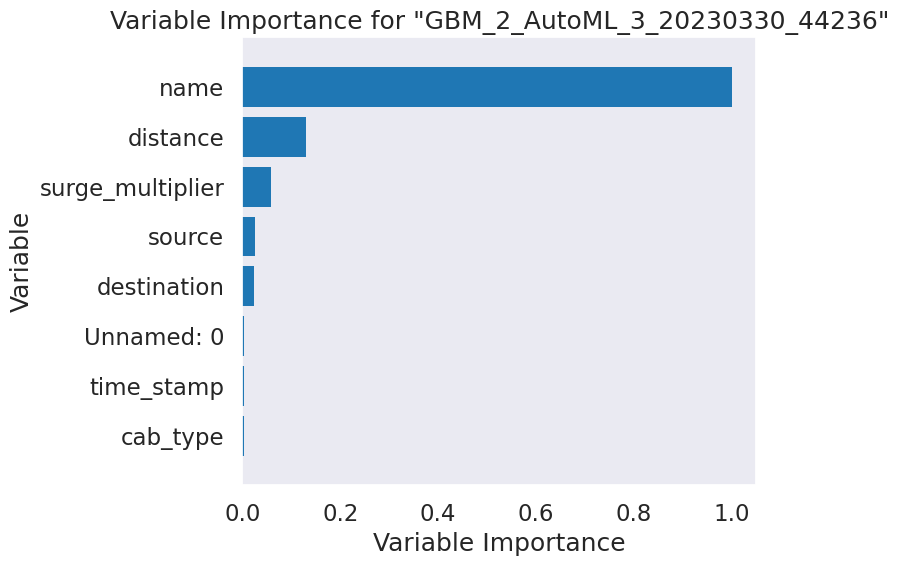

In [132]:

%matplotlib inline
#best_model.varimp_plot()
explain_model = aml.explain(frame = df_test, figsize = (8,6),include_explanations=['varimp', ])

In [134]:
model = aml.get_best_model(algorithm='gbm')
#model.varimp_plot()

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                   rmse       mse       mae      rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo
------------------------------------------------------  -------  --------  --------  ---------  ------------------------  ------------------  -------------------------  ---------------
GBM_4_AutoML_3_20230330_44236                           1.21704   1.48118  0.83182   0.0858585                   1.48118                4096                   0.046598  GBM
GBM_3_AutoML_3_20230330_44236                           1.36654   1.86742  0.939475  0.0969273                   1.86742                3921                   0.032349  GBM
StackedEnsemble_AllModels_3_AutoML_3_20230330_44236     1.40116   1.96324  0.963745  0.0989957                   1.96324                1508                   0.088215  StackedEnsemble
StackedEnsemble_AllModels_2_AutoML_3_20230330_44236     1.40116   1.96324  0.963745  0.0989957                   1.96324                1363                   0.122946  StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_3_20230330_44236     1.40116   1.96324  0.963745  0.0989957                   1.96324                1381                   0.088296  StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_3_20230330_44236  1.42101   2.01928  0.937985  0.094148                    2.01928                1016                   0.064429  StackedEnsemble
GBM_1_AutoML_3_20230330_44236                           1.42188   2.02173  0.938482  0.0943031                   2.02173               10760                   0.203744  GBM
StackedEnsemble_BestOfFamily_2_AutoML_3_20230330_44236  1.42587   2.0331   0.982931  0.100791                    2.0331                  877                   0.039686  StackedEnsemble
StackedEnsemble_BestOfFamily_3_AutoML_3_20230330_44236  1.42587   2.0331   0.982931  0.100791                    2.0331                  888                   0.04184   StackedEnsemble
GBM_2_AutoML_3_20230330_44236                           1.42773   2.03842  0.986116  0.101138                    2.03842                4183                   0.050634  GBM
DRF_1_AutoML_3_20230330_44236                           1.51743   2.3026   1.02093   0.109859                    2.3026                 4403                   0.01987   DRF
GBM_5_AutoML_3_20230330_44236                           1.77646   3.15582  1.26562   0.126352                    3.15582                1579                   0.007275  GBM
GBM_grid_1_AutoML_3_20230330_44236_model_1              2.53716   6.43719  1.86502   0.159914                    6.43719                1634                   0.012156  GBM
StackedEnsemble_BestOfFamily_4_AutoML_3_20230330_44236  2.94565   8.67683  2.336     0.208744                    8.67683                4964                   0.069792  StackedEnsemble
XRT_1_AutoML_3_20230330_44236                           4.10324  16.8366   3.14432   0.259956                   16.8366                 1385                   0.025844  DRF
GBM_grid_1_AutoML_3_20230330_44236_model_2              7.77218  60.4068   6.24425   0.463386                   60.4068                   83                   0.000626  GBM
GLM_1_AutoML_3_20230330_44236                           9.3039   86.5625   7.54584   0.544671                   86.5625                   51                   0.000318  GLM
[17 rows x 9 columns]

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

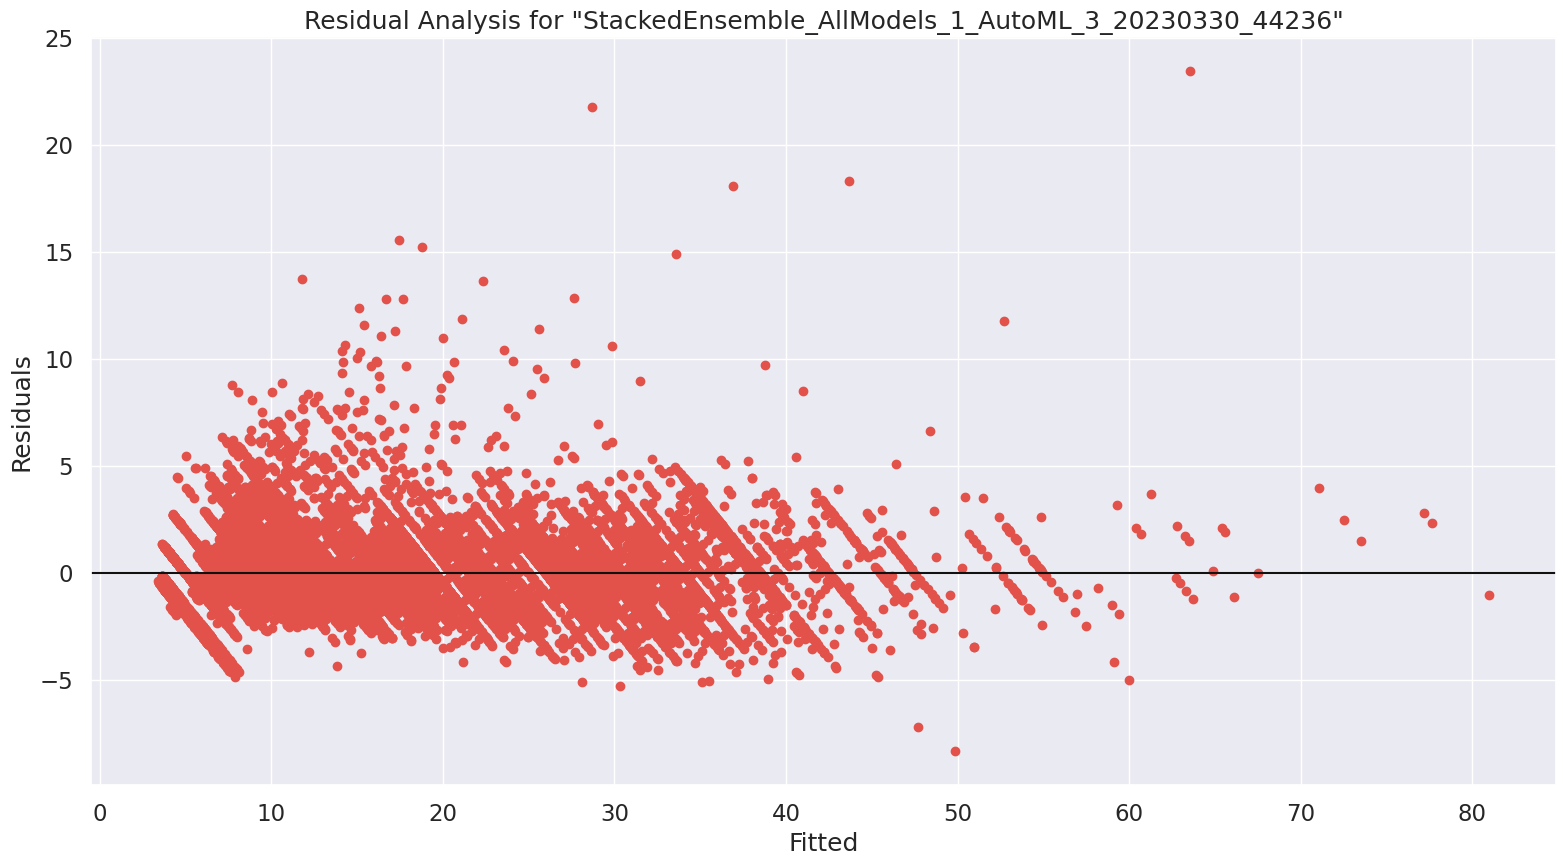

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

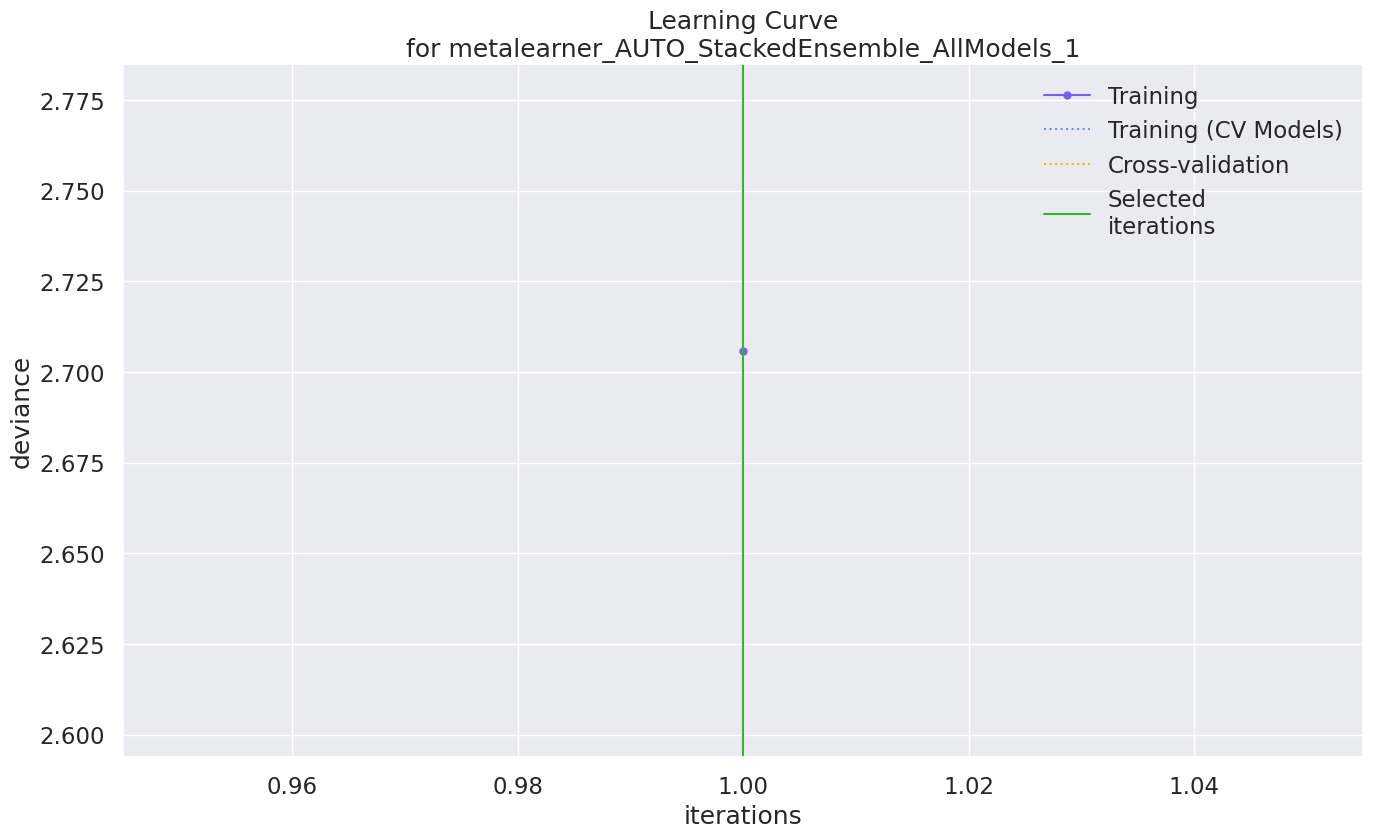

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

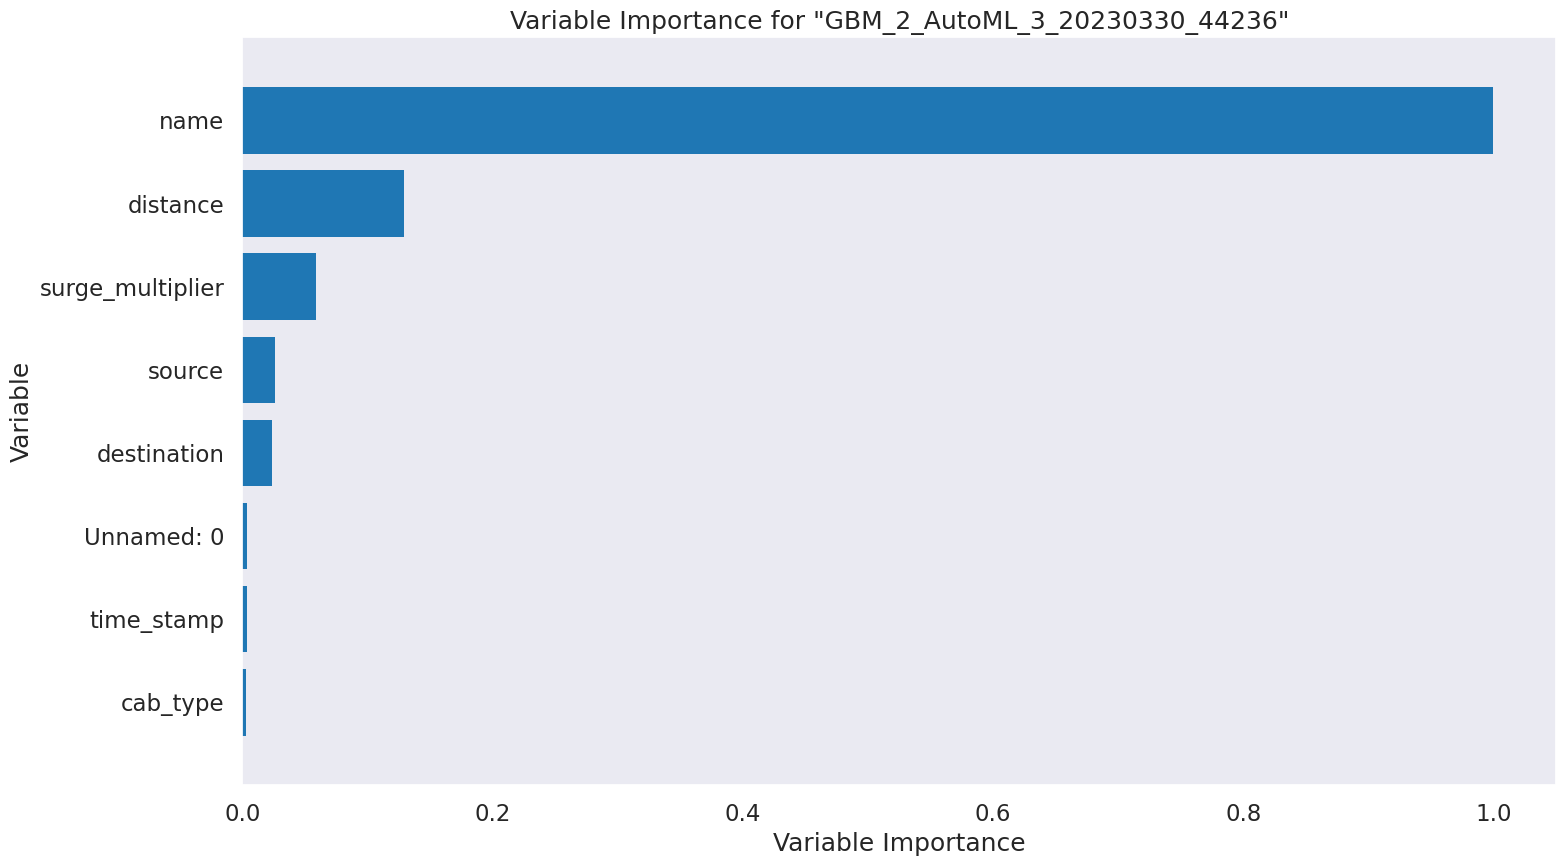

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

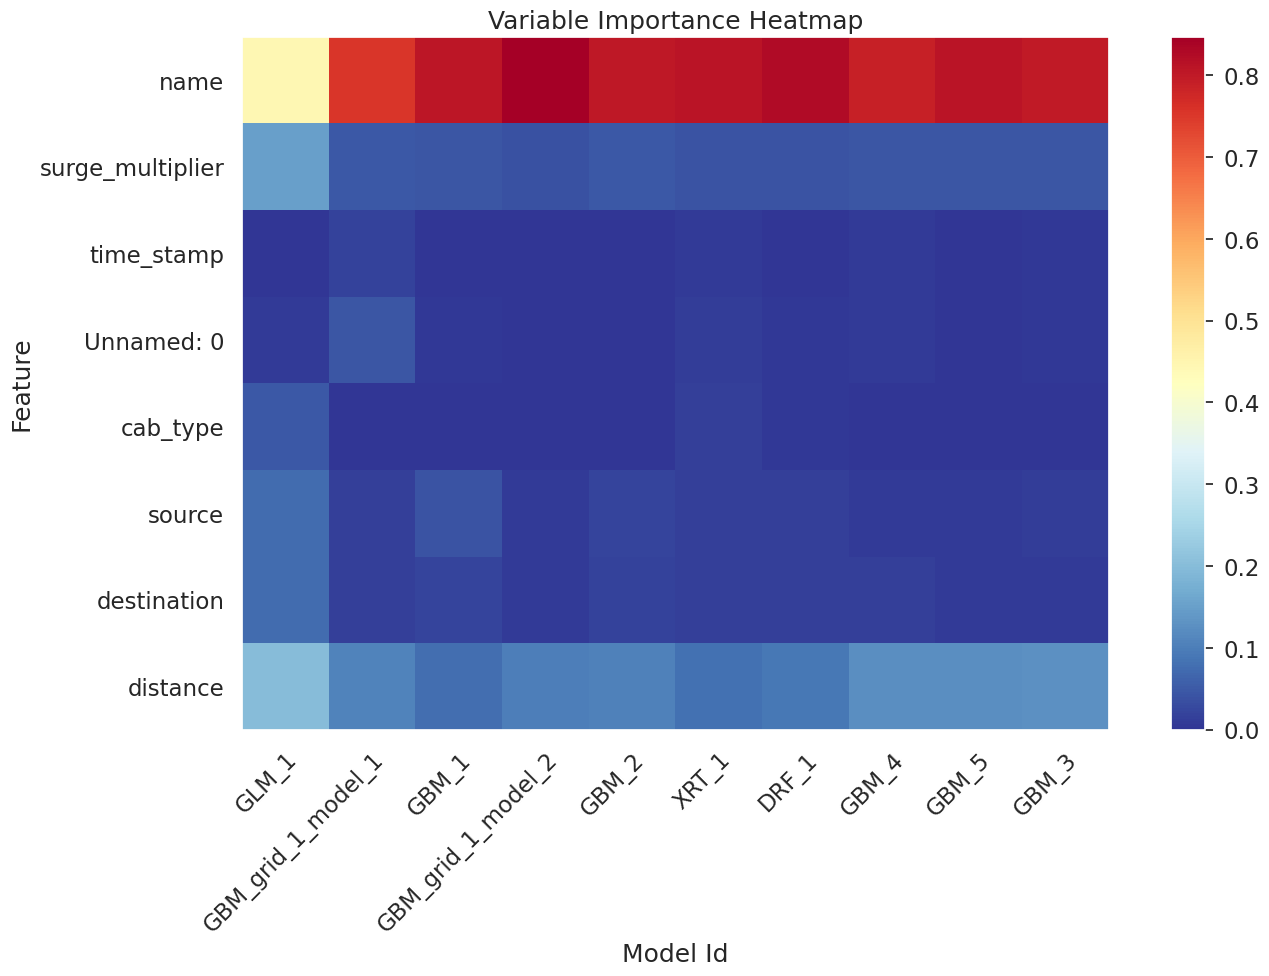

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

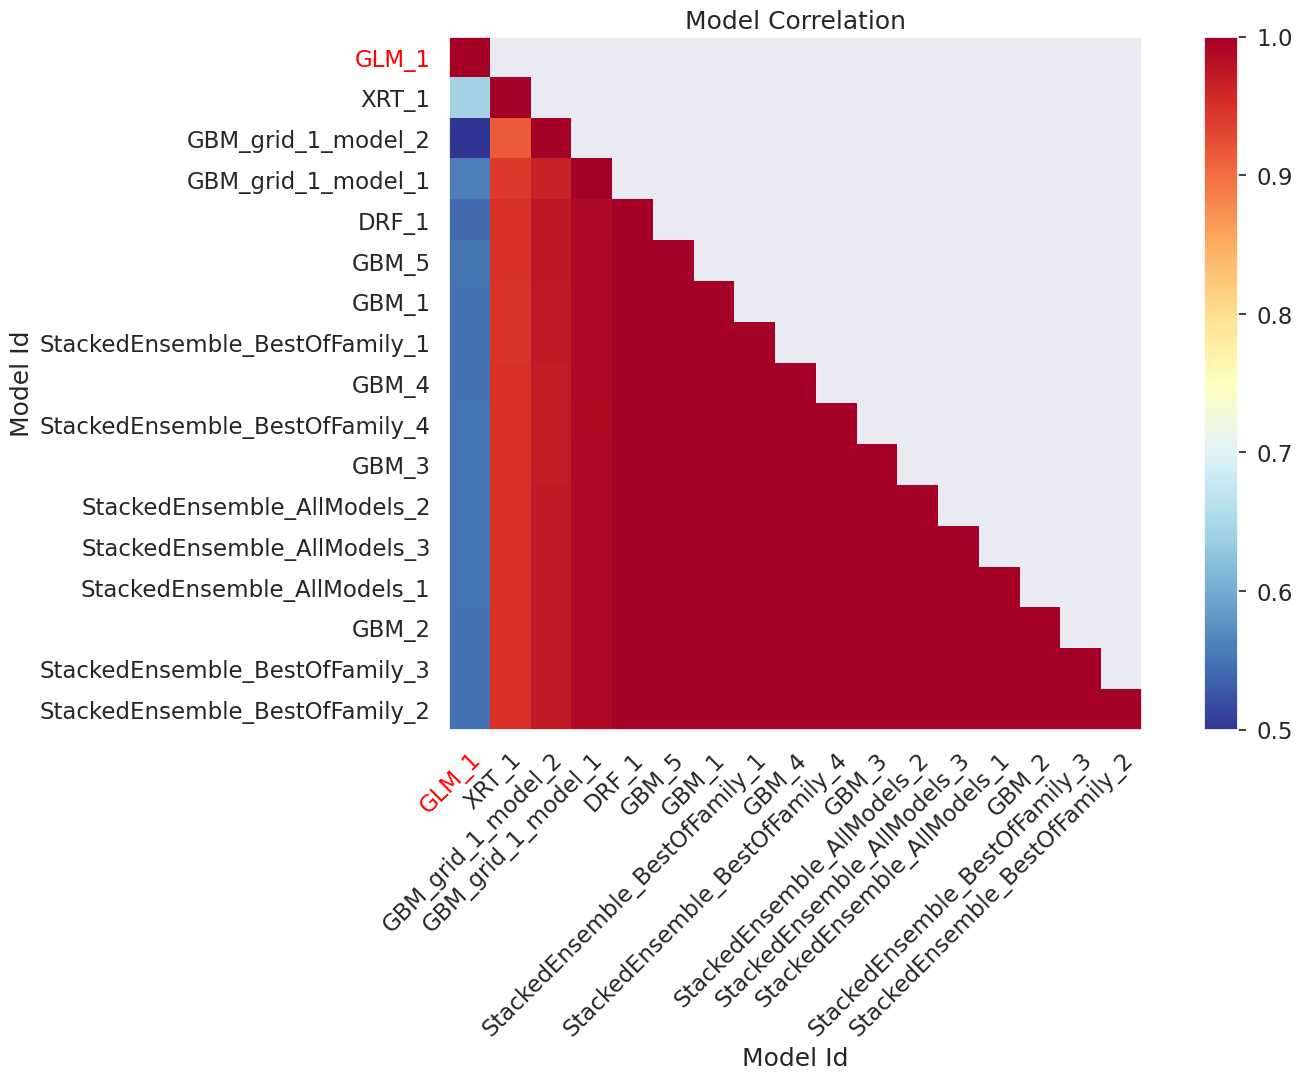

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

RuntimeError: ignored

In [135]:
exa = aml.explain(df_train, exclude_explanations=['pdp'])

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

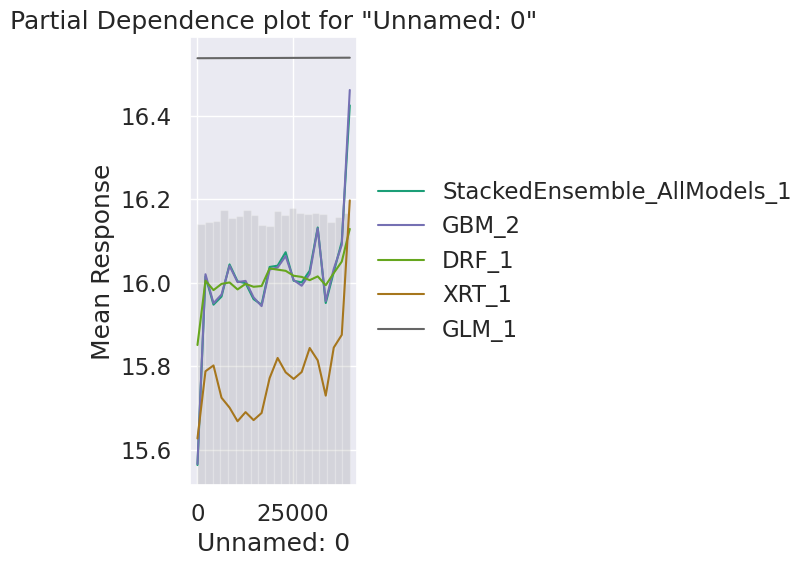

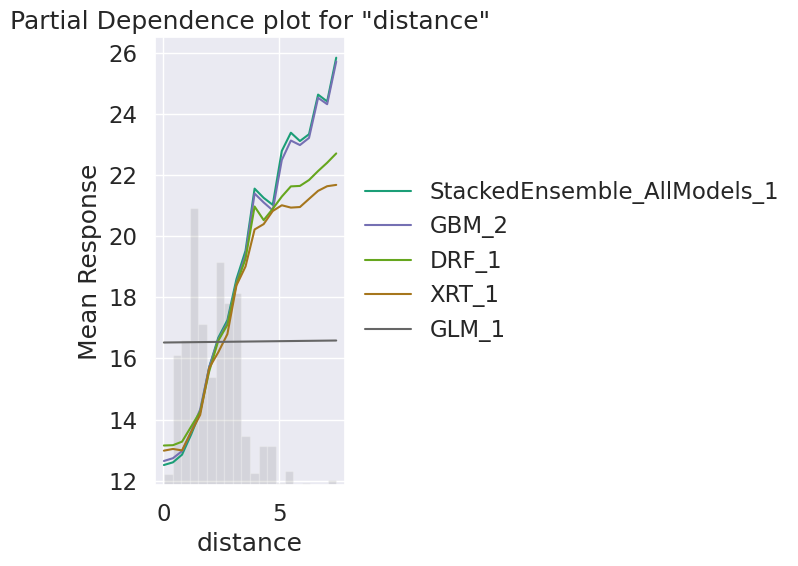

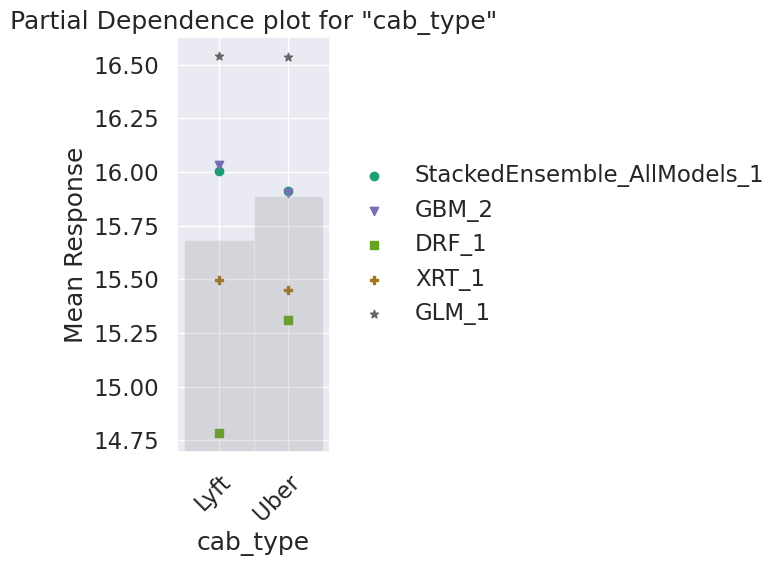

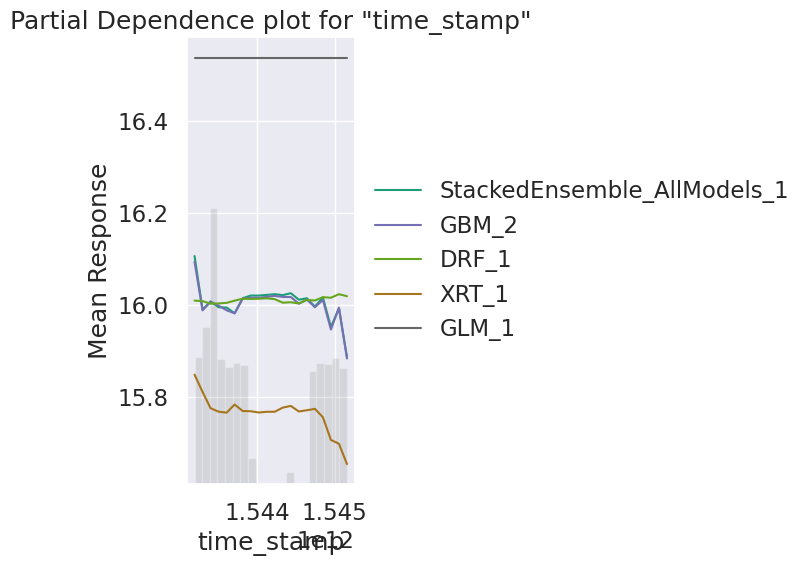

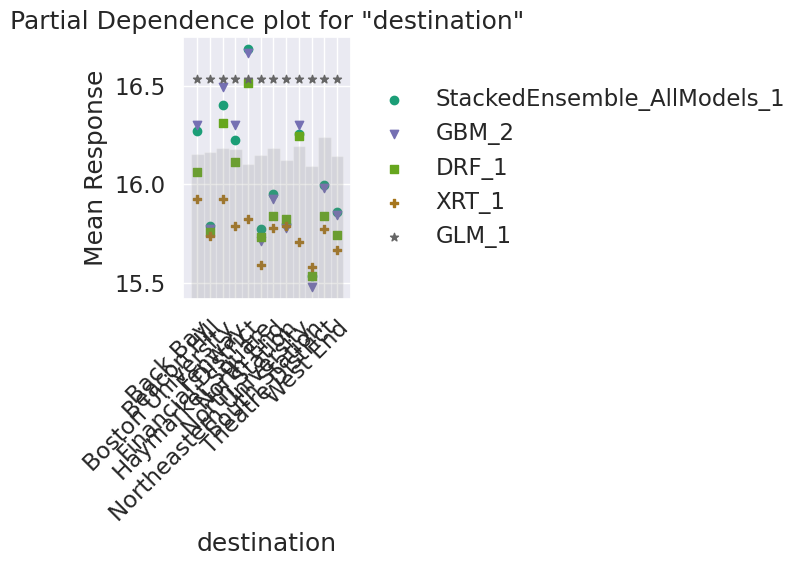

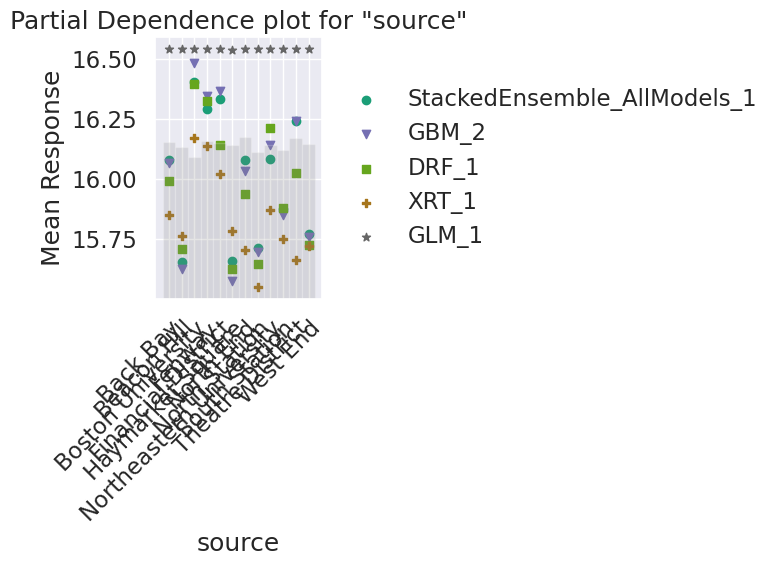

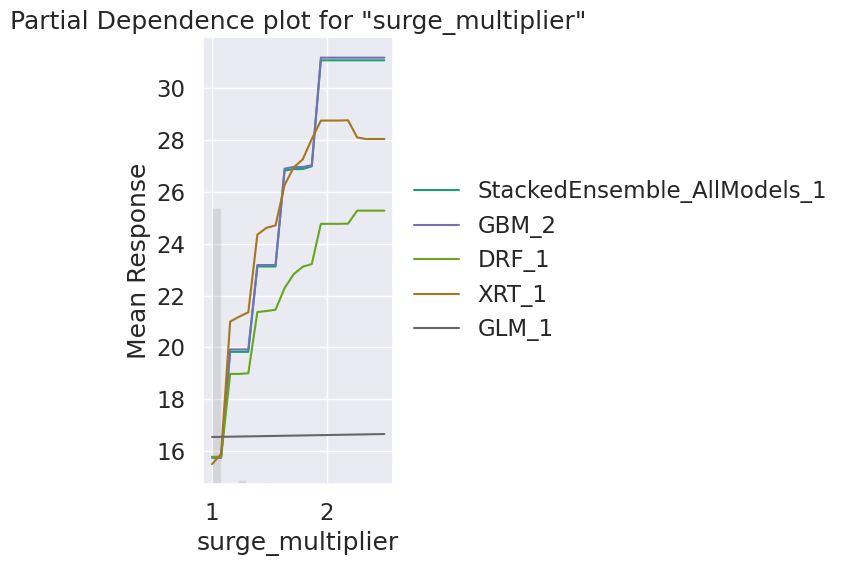

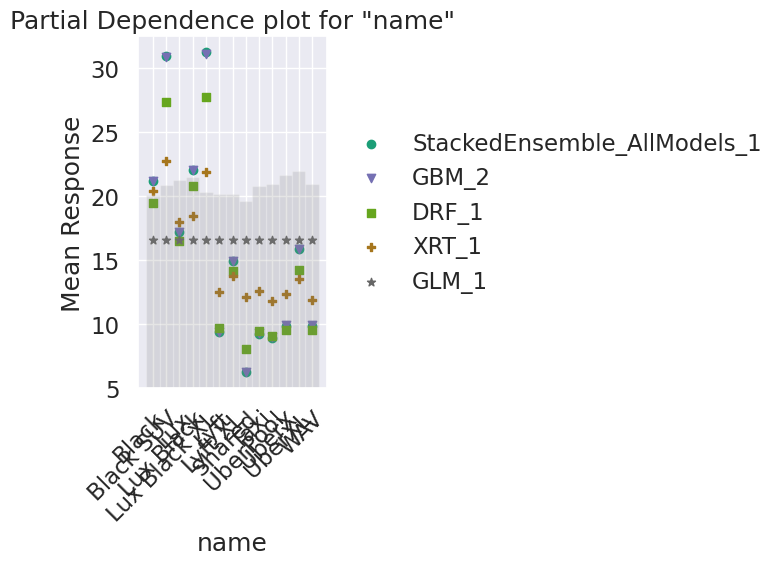

In [137]:
explain_model = aml.explain(frame = df_test, figsize = (8,6),include_explanations=['pdp'])

## Conclusion
Both SHAP and LIME are popular techniques used for interpreting the predictions of machine learning models, but they differ in their strengths and limitations.

SHAP is a global explanation method that assesses the importance of each feature across the entire dataset. It employs game theory and provides a consistent and rigorous approach to feature importance that is not influenced by the choice of background distribution. SHAP values have several desirable characteristics, including local accuracy, consistency, and missingness.

LIME, on the other hand, is a local explanation method that generates a simplified model to approximate the behavior of the original model in the vicinity of a specific instance. It accomplishes this by perturbing the input features of the instance and observing the effects on the model's output. LIME is relatively straightforward to use and can be applied to a broad range of models.

Each of these model interpretability techniques has its own unique set of applications and benefits, and their use should be determined based on the specific model analysis needs.

#References

https://towardsdatascience.com/python-automl-sklearn-fd85d3b3c5e

https://towardsdatascience.com/python-automl-sklearn-fd85d3b3c5e

https://towardsdatascience.com/python-automl-sklearn-fd85d3b3c5e

https://towardsdatascience.com/python-automl-sklearn-fd85d3b3c5e

MIT License

Copyright (c) 2023 Tanmay Vijay Shekhar

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE